<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea5/lennar_jonnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generación 1: Energía mínima = -12.070130961484752
Generación 2: Energía mínima = -12.070130961484752
Generación 3: Energía mínima = -12.072738393980778
Generación 4: Energía mínima = -12.103346767908402
Generación 5: Energía mínima = -12.103346767908402
Generación 6: Energía mínima = -13.162342889195136
Generación 7: Energía mínima = -13.13274605329405
Generación 8: Energía mínima = -13.162342889195136
Generación 9: Energía mínima = -13.162342889195136
Generación 10: Energía mínima = -13.395267556844516
Generación 11: Energía mínima = -13.162342889195136
Generación 12: Energía mínima = -13.190398428300183
Generación 13: Energía mínima = -13.395267556844516
Generación 14: Energía mínima = -13.457755310877527
Generación 15: Energía mínima = -13.424858574368361
Generación 16: Energía mínima = -14.044603737888437
Generación 17: Energía mínima = -14.074191094679037
Generación 18: Energía mínima = -14.042275505827162
Generación 19: Energía mínima = -14.044603737888437
Generación 20: Energía

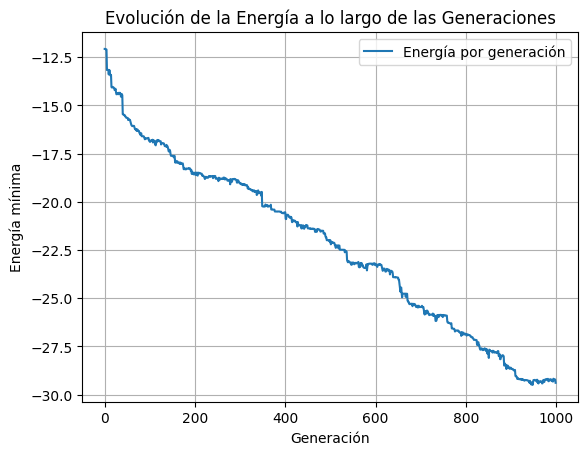

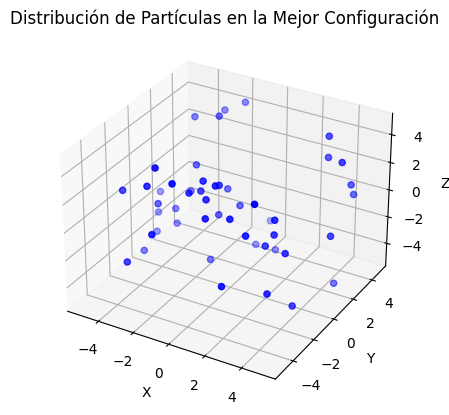

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
def TotalEnergy(positions, epsilon=1, sigma=1, min_distance=0.1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    Evita distancias muy pequeñas para prevenir singularidades.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            if r >= min_distance:  # Evitar distancias muy pequeñas
                energy += LennardJones(r, epsilon, sigma)
            else:
                energy += 1e6  # Penalización para distancias muy cercanas
    return energy

# Parámetros del sistema
N_particles = 50
population_size = 30
generations = 1000 # cambiar para mayor precision
mutation_rate = 0.1
epsilon = 1
sigma = 1

def generate_random_positions(num_particles, box_size=10.0):
    return np.random.uniform(-box_size/2, box_size/2, (num_particles, 3))

def genetic_algorithm(num_particles, population_size, generations, mutation_rate):
    population = [generate_random_positions(num_particles) for _ in range(population_size)]
    energy_history = []

    for generation in range(generations):
        energies = np.array([TotalEnergy(p) for p in population])
        min_energy_offset = abs(min(energies)) + 1 if min(energies) <= 0 else 0
        adjusted_energies = energies + min_energy_offset
        min_energy = min(energies)
        energy_history.append(min_energy)
        print(f"Generación {generation + 1}: Energía mínima = {min_energy}")
        inverse_adjusted_energies = 1 / adjusted_energies
        probabilities = inverse_adjusted_energies / inverse_adjusted_energies.sum()
        selected_indices = np.random.choice(range(population_size), size=population_size, p=probabilities)
        selected_population = [population[i] for i in selected_indices]
        new_population = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            crossover_point = np.random.randint(1, num_particles - 1)
            child1 = np.vstack((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.vstack((parent2[:crossover_point], parent1[crossover_point:]))
            for child in [child1, child2]:
                if np.random.rand() < mutation_rate:
                    mutation_index = np.random.randint(num_particles)
                    child[mutation_index] += np.random.normal(0, 0.1, 3)  # pequeña perturbación
                new_population.append(child)
        population = new_population
    final_energies = [TotalEnergy(p) for p in population]
    best_configuration = population[np.argmin(final_energies)]
    best_energy = min(final_energies)

    return best_configuration, best_energy, energy_history
best_positions, best_energy, energy_history = genetic_algorithm(N_particles, population_size, generations, mutation_rate)
plt.figure()
plt.plot(energy_history, label='Energía por generación')
plt.xlabel("Generación")
plt.ylabel("Energía mínima")
plt.title("Evolución de la Energía a lo largo de las Generaciones")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(best_positions[:, 0], best_positions[:, 1], best_positions[:, 2], c='b', marker='o')
ax.set_title("Distribución de Partículas en la Mejor Configuración")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
